In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()


Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [8]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/AdventureWorks.xlsx")

In [9]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [10]:
df.shape

(904, 16)

In [11]:
df.dtypes

,0
Data Venda,datetime64[ns]
Data Envio,datetime64[ns]
ID Loja,int64
ID Produto,int64
ID Cliente,int64
No. Venda,object
Custo Unitário,float64
Preço Unitário,float64
Quantidade,int64
Valor Desconto,float64


In [15]:
df["Valor Venda"].sum()

5984606.1426

In [16]:
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #criar coluna custo

In [17]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [18]:
round(df["custo"].sum(),2) #qual o custo total

2486783.05

In [19]:
df["lucro"] = df["Valor Venda"] - df["custo"] #criar coluna lucro

In [20]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [21]:
round(df["lucro"].sum(),2) #qual o lucro total

3497823.09

In [22]:
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"] #criar coluna tempo de envio

In [23]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [24]:
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days #transformar em dias

In [25]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [26]:
df["Tempo_envio"].dtype

dtype('int64')

In [27]:
df.groupby("Marca")["Tempo_envio"].mean() #tempo de envio por marca

,Tempo_envio
Marca,
Adventure Works,8.663866
Contoso,8.470930
Fabrikam,8.510121


In [28]:
df.isnull().sum() #verificar se tem valores nulos

,0
Data Venda,0
Data Envio,0
ID Loja,0
ID Produto,0
ID Cliente,0
No. Venda,0
Custo Unitário,0
Preço Unitário,0
Quantidade,0
Valor Desconto,0


In [31]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum() #agrupar por ano e marc

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [30]:
pd.options.display.float_format = '{:20,.2f}'.format #formatar casas decimais

In [32]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index() #criar novo df
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [33]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False) #quantidade vendida por produto

,Quantidade
Produto,
Headphone Adapter for Contoso Phone E130 Silver,25232
Headphone Adapter for Contoso Phone E130 White,25008
Adventure Works Laptop15.4W M1548 Black,1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
Adventure Works Laptop15.4W M1548 Red,1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


Text(0, 0.5, 'Produto')

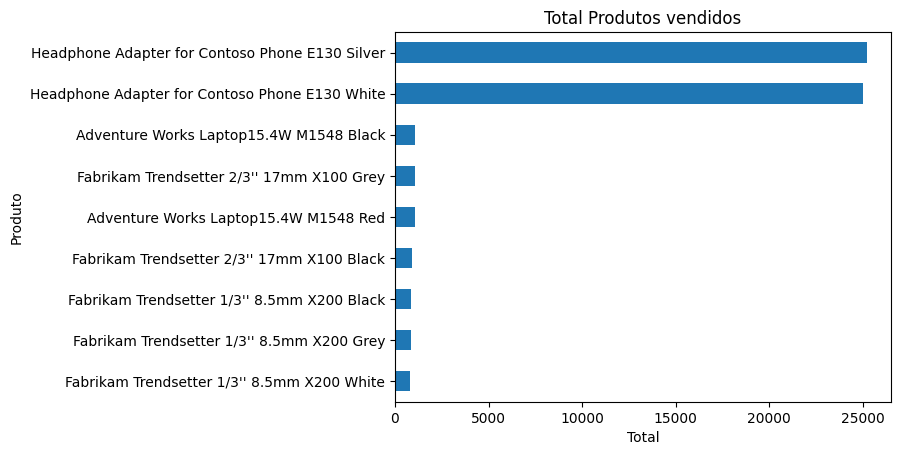

In [36]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos vendidos") #quantidade vendida por produto
plt.xlabel("Total")
plt.ylabel("Produto")

Text(0, 0.5, 'Receita')

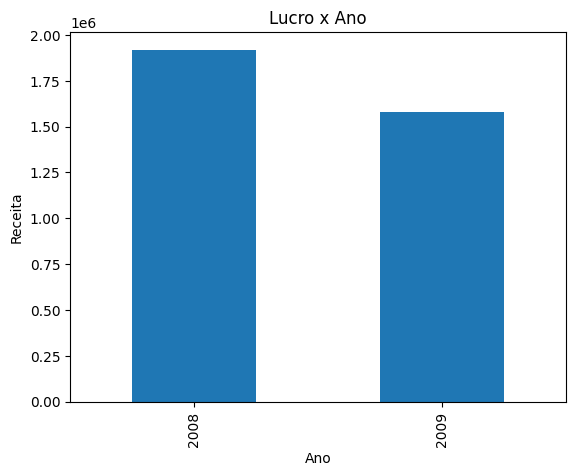

In [37]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano") #lucro por ano
plt.xlabel("Ano")
plt.ylabel("Receita")


In [38]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum() #lucro por ano


,lucro
Data Venda,
2008,"1,920,077.71"
2009,"1,577,745.38"


In [39]:
df_2009 = df[df["Data Venda"].dt.year == 2009] #criar novo df com dados de 2009

In [40]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

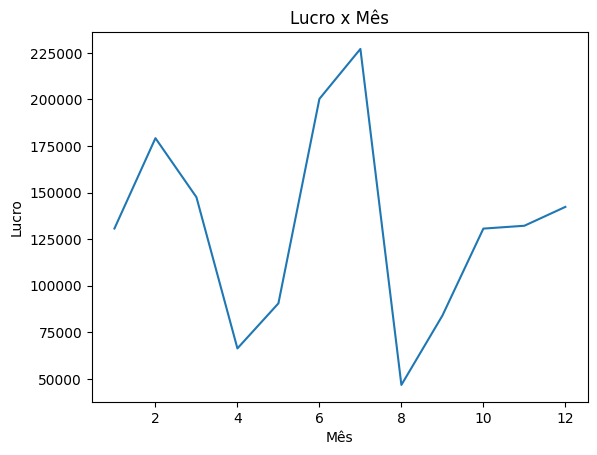

In [41]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês") #lucro por mês
plt.xlabel("Mês")
plt.ylabel("Lucro")


(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

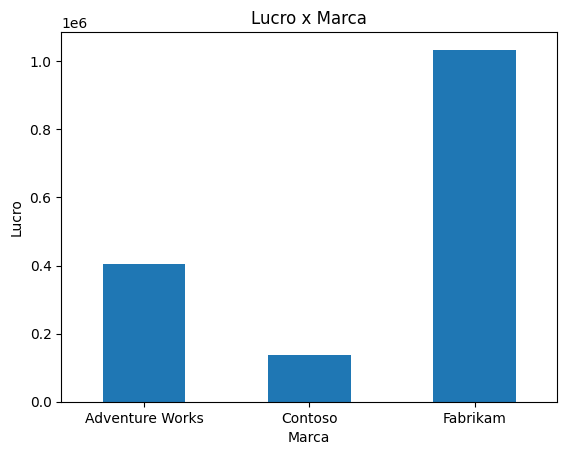

In [42]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca") #lucro por marca
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")


(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

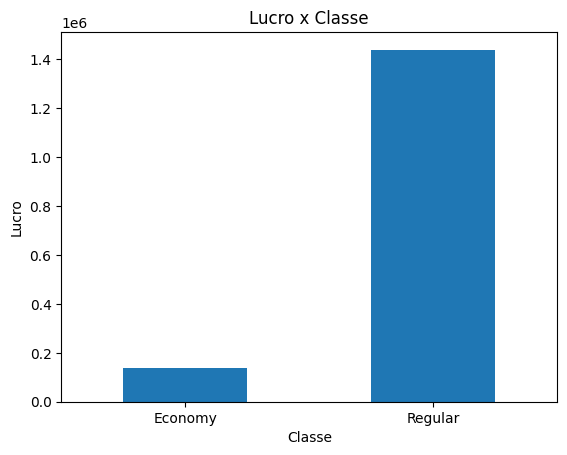

In [43]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe") #lucro por classe
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")


In [44]:
df["Tempo_envio"].describe() #descrição do tempo de envio (dias)


,Tempo_envio
count,904.00
mean,8.54
std,3.06
min,4.00
25%,6.00
50%,9.00
75%,11.00
max,20.00


{'whiskers': [<matplotlib.lines.Line2D at 0x7f96e627af50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f96e6223a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f96e627ad40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f96e5cf3ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f96e5cf2aa0>],
 'means': []}

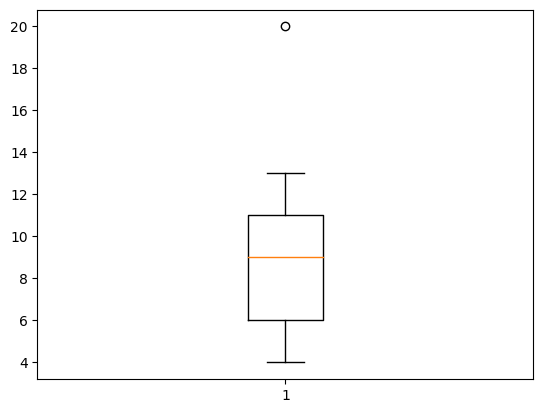

In [45]:
plt.boxplot(df["Tempo_envio"]) #boxplot do tempo de envio


(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

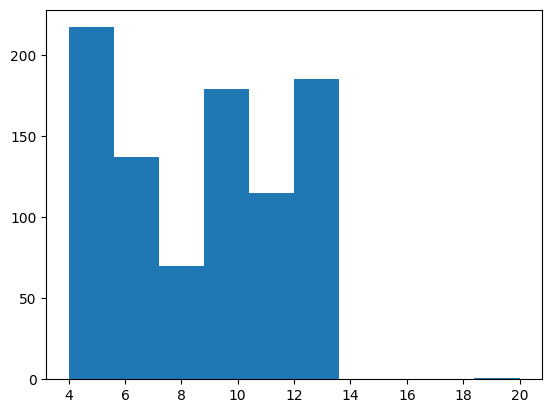

In [46]:
plt.hist(df["Tempo_envio"]) #histograma do tempo de envio

In [47]:
df["Tempo_envio"].min() #tempo de envio mínimo

4

In [48]:
df["Tempo_envio"].max() #tempo de envio máximo

20

In [50]:
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [52]:
df.to_csv("df_vendas_novo.csv", index=False) #exportar para csv